# Lab09

Model Synthesis

In [1]:
using Cropbox

WebIO._IJuliaInit()

In [2]:
Cropbox.Interact.WebIO.setup(:ijulia)

WebIO._IJuliaInit()

## Garlic Model

### Architecture

In this notebook, we'll be taking a brief look at the [garlic model](https://doi.org/10.1101/2021.11.04.467009). The [original model](https://doi.org/10.1093/aob/mcz060) was written in C++ and later reimplemented in Julia as a testbed for developing Cropbox framework.

In [3]:
using Garlic

The garlic model is named `Model` system in the `Garlic` package.

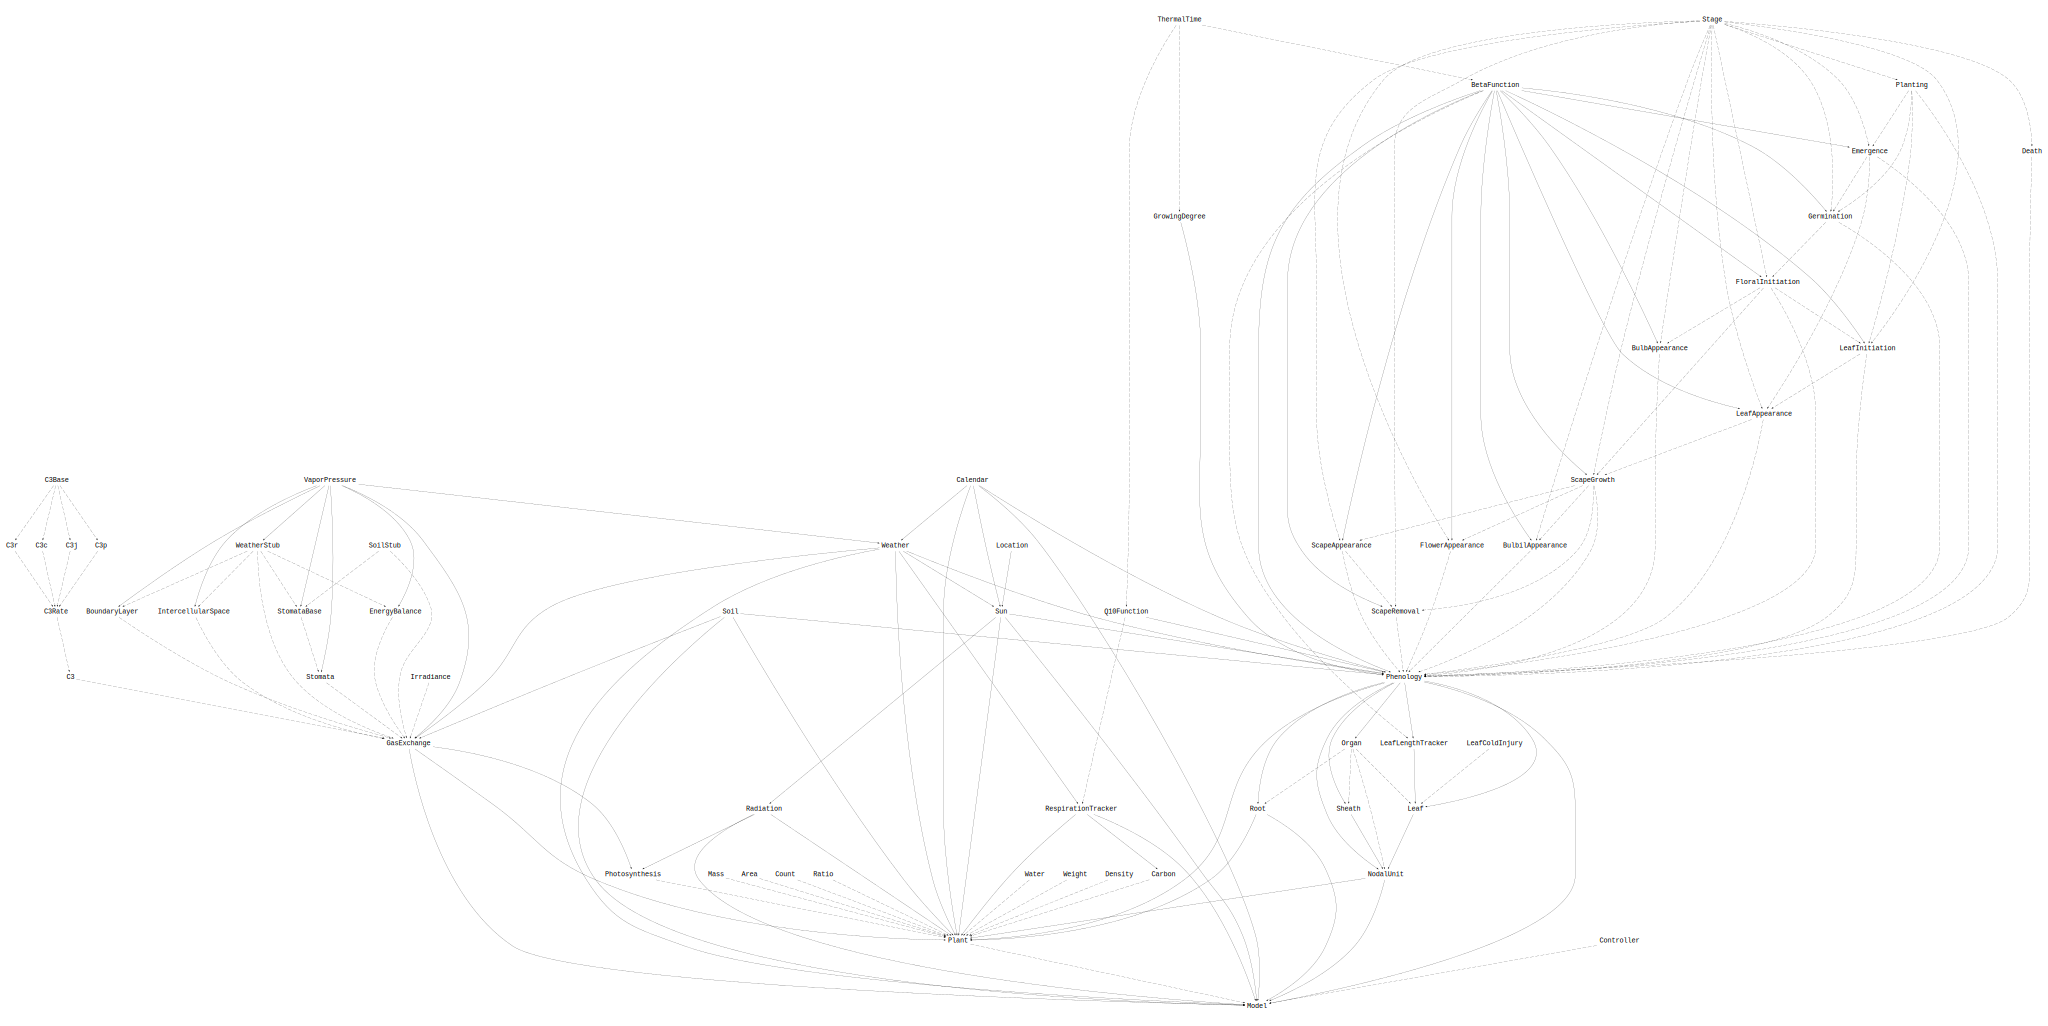

In [4]:
Cropbox.hierarchy(Garlic.Model; skipcontext = true)

The model may look quite complex since, for example, the coupled gas-exchange model is included just as a component in this model. Yet, the structure of the model must not be too unfamiliar since the most parts of underlying concepts (*i.e.* leaf growth, phenology, carbon allocation) have been already covered in the class. If interested in the details how the model is implemented, feel free to read source code in the [Garlic.jl](https://github.com/cropbox/Garlic.jl) repository.

### Parameters

Now take a look at the parameters used by the model. Most of these parameters are described in [Hsiao *et al.* (2019)](https://doi.org/10.1093/aob/mcz060).

In [5]:
parameters(Garlic.Model; alias = true, recursive = true)

Config for 21 systems:
  Clock
    init = 0 hr
    step = 1 hr
  Context
  BetaFunction
    maximum_temperature = nothing
    minimum_temperature = 0 °C
    optimal_temperature = nothing
    beta                = 1
  GrowingDegree
    base_temperature    = nothing
    maximum_temperature = nothing
    optimal_temperature = nothing
  Q10Function
    Q10                 = 2
    optimal_temperature = nothing
  Phenology
    optimal_temperature           = 22.28 °C
    ceiling_temperature           = 34.23 °C
    planting_date                 = nothing
    emergence_date                = nothing
    maximum_emergence_rate        = 0.0876 d⁻¹
    emergence_optimal_temperature = 12.7 °C
    emergence_ceiling_temperature = 35.9 °C
    critical_photoperiod          = 12.5 hr
    storage_days                  = 100 d
    storage_temperature           = 5 °C
    initial_leaves_at_harvest     = 4
    maximum_leaf_initiation_rate  = 0.2 d⁻¹
    maximum_phyllochron_asymptote = 0.4421 d⁻¹
    (LeafA

`Garlic` package also provides a few sample configurations in its `Examples` module for testing. We'll pick up `RCP.ND_RICCA_2014_field` which is a configuration for the experiment conducted in 2014 with a cultivar named Namdo (ND) in the field located at the Research Institute of Climate Change and Agriculture (RICCA) in Jeju, Korea.

In [6]:
config = Garlic.Examples.RCP.ND_RICCA_2014_field

Config for 7 systems:
  Phenology
    optimal_temperature           = 22.28
    ceiling_temperature           = 34.23
    critical_photoperiod          = 12
    maximum_leaf_initiation_rate  = 0.1003
    storage_temperature           = 8
    maximum_phyllochron_asymptote = 0.4421
    leaves_generic                = 10
    initial_leaves_at_harvest     = 6
    scape_appearance_threshold    = 3.0
    planting_date                 = ZonedDateTime(2014, 10, 8, tz"Asia/Seoul")
    scape_removal_date            = nothing
    harvest_date                  = ZonedDateTime(2015, 6, 19, tz"Asia/Seoul")
    storage_days                  = 100
  Leaf
    maximum_elongation_rate        = 5.0
    minimum_length_of_longest_leaf = 90.0
    stay_green                     = 1.5
  Carbon
    maintenance_respiration_coefficient = 0.015
    synthesis_efficiency                = 0.75
    partitioning_table                  = [0.0 0.0 … 0.0 0.0; 0.35 0.3 … 0.0 0.1; … ; 0.05 0.0 … 0.0 0.95; 0.0 0.0 … 0.0 0.0]

### Simulation

We'll rely on `simulate()` function as we always did, but with a slightly different syntax. Let's take a look at the arguments one by one.

The number of model updates for stop condition (`stop`) is provided by `count` variable in the `calendar` system and is determined by start (`calendar.init`) and end date (`calendar.last`) specified in the configuration.

In [7]:
stop = "calendar.count"

"calendar.count"

For target variables (`target`) included in the output, not only all variables exposed in the `Model` system (`"*"`), we also want to extract other variables from the nested phenology system (`"pheno.*"`).

In [8]:
target = ["*", "pheno.*"]

2-element Vector{String}:
 "*"
 "pheno.*"

`snap` determines how often a *snapshot* of the model should be captured and recorded in the output. Since the default time unit (`1u"hr"`) is too fine-grained in the scale of garlic growth which takes several months, we want to write down our results in a daily unit (`1u"d"`) instead for performance reason.

In [9]:
snap = 1u"d"

1 d

After setting up all required arguments, running simulation is simple as `simulate()` for other models. It will just take a while to run for the first time as we already got used to do with how Julia works.

In [10]:
sim = simulate(Garlic.Model; config, stop, target, snap)

Progress: 100%[===========================] Time: 0:01:00 ( 9.24 ms/it)/it)


273×185 DataFrame
 Row │ time                       initial_leaf_ratio  potential_leaf_area_incr ⋯
     │ ZonedDat…                  Float64             Quantity…                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2014-10-01T00:00:00+09:00               0.126                       0.0 ⋯
   2 │ 2014-10-02T00:00:00+09:00               0.126                       0.0
   3 │ 2014-10-03T00:00:00+09:00               0.126                       0.0
   4 │ 2014-10-04T00:00:00+09:00               0.126                       0.0
   5 │ 2014-10-05T00:00:00+09:00               0.126                       0.0 ⋯
   6 │ 2014-10-06T00:00:00+09:00               0.126                       0.0
   7 │ 2014-10-07T00:00:00+09:00               0.126                       0.0
   8 │ 2014-10-08T00:00:00+09:00               0.126                       0.0
   9 │ 2014-10-09T00:00:00+09:00               0.126                       0.0 ⋯
  10 │ 2014-10-10T00:00:00+09:00               0.126                       0.0
  11 │ 2014-10-11T00:00:00+09:00               0.126                       0.0
  ⋮  │             ⋮                      ⋮                        ⋮           ⋱
 264 │ 2015-06-21T00:00:00+09:00               0.126                       0.0
 265 │ 2015-06-22T00:00:00+09:00               0.126                       0.0 ⋯
 266 │ 2015-06-23T00:00:00+09:00               0.126                       0.0
 267 │ 2015-06-24T00:00:00+09:00               0.126                       0.0
 268 │ 2015-06-25T00:00:00+09:00               0.126                       0.0
 269 │ 2015-06-26T00:00:00+09:00               0.126                       0.0 ⋯
 270 │ 2015-06-27T00:00:00+09:00               0.126                       0.0
 271 │ 2015-06-28T00:00:00+09:00               0.126                       0.0
 272 │ 2015-06-29T00:00:00+09:00               0.126                       0.0
 273 │ 2015-06-30T00:00:00+09:00               0.126                       0.0 ⋯
                                                183 columns and 252 rows omitted

### Output

The result contains lots of variables. Here is a graph of simulated green leaf area over time.

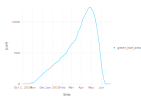

In [11]:
visualize(sim, :time, :green_leaf_area; kind = :line)

For comparison, we'll load up an observation dataset included in the package.

In [12]:
using CSV
using DataFrames

obs = CSV.read(Garlic.datapath("Korea/ricca_2014_field.csv"), DataFrame) |> unitfy

160×23 DataFrame
 Row │ cultivar  planting_date  measuring_date  plant_height  bulb_diameter  b ⋯
     │ String3   Date           Date            Quantity…     Quantity…      Q ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ ND        2014-10-08     2015-01-16           61.4 cm        17.8 mm    ⋯
   2 │ ND        2014-10-08     2015-01-16           53.6 cm        22.1 mm 
   3 │ ND        2014-10-08     2015-01-16           58.2 cm        18.8 mm 
   4 │ ND        2014-10-08     2015-01-16           60.2 cm        19.0 mm 
   5 │ ND        2014-10-08     2015-01-16           56.1 cm        19.9 mm    ⋯
   6 │ ND        2014-10-08     2015-01-16           63.3 cm        24.9 mm 
   7 │ ND        2014-10-08     2015-01-16           62.6 cm        21.2 mm 
   8 │ ND        2014-10-08     2015-01-16           57.5 cm        19.7 mm 
   9 │ ND        2014-10-08     2015-01-16           59.5 cm        22.3 mm    ⋯
  10 │ ND        2014-10-08     2015-01-16           59.2 cm        17.6 mm 
  11 │ ND        2014-10-08     2015-01-23           64.4 cm        24.2 mm 
  ⋮  │    ⋮            ⋮              ⋮              ⋮              ⋮          ⋱
 151 │ ND        2014-10-08     2015-06-04           85.2 cm        60.6 mm
 152 │ ND        2014-10-08     2015-06-04           77.1 cm        62.7 mm    ⋯
 153 │ ND        2014-10-08     2015-06-04           94.1 cm        56.2 mm
 154 │ ND        2014-10-08     2015-06-04          112.4 cm        58.1 mm
 155 │ ND        2014-10-08     2015-06-04           81.2 cm        51.0 mm
 156 │ ND        2014-10-08     2015-06-04           87.8 cm        59.9 mm    ⋯
 157 │ ND        2014-10-08     2015-06-04          106.2 cm        52.2 mm
 158 │ ND        2014-10-08     2015-06-04           94.8 cm        64.0 mm
 159 │ ND        2014-10-08     2015-06-04           78.2 cm        56.4 mm
 160 │ ND        2014-10-08     2015-06-04          102.8 cm        58.0 mm    ⋯
                                                 18 columns and 139 rows omitted

Here is a plot of the green leaf area with observation.

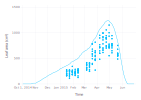

In [13]:
p = visualize(sim, :time, :green_leaf_area;
    kind = :line,
    ylim = (0, 1500),
    xlab = "Time",
    ylab = "Leaf area",
    name = "",
)
visualize!(p, obs, :measuring_date, :leaf_area;
    name  = "",
    color = 1,
)

Similary, we can make other plots. Here is a plot of biomass accumulated for each organ.

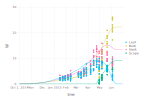

In [14]:
p = visualize(sim, :time, [:living_leaf_mass, :bulb_mass, :living_stalk_mass, :visible_scape_mass];
    kind  = :line,
    ylim  = (0, 30),
    names = ["Leaf", "Bulb", "Stalk", "Scape"],
)
visualize!(p, obs, :measuring_date, [:leaf_dry_weight, :bulb_dry_weight, :stem_dry_weight, :scape_dry_weight];
    colors = [1, 2, 3, 4],
    names  = [],
)

Here is a plot of leaf count per leaf development stage with observation.

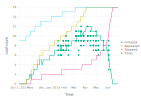

In [15]:
p = visualize(sim, :time, :leaves_initiated;
    kind = :line,
    ylim = (0, 16),
    xlab = "Time",
    ylab = "Leaf count",
    name = "Initiated",
)
visualize!(p, sim, :time, [:leaves_appeared, :leaves_dropped, :leaves_fresh];
    kind  = :line,
    names = ["Appeared", "Dropped", "Total"],
)
visualize!(p, obs, :measuring_date, :leaf_count;
    name  = "",
    color = 4,
)

Here is an overall change of development phase due to phenology in the model.

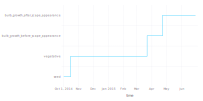

In [16]:
import Gadfly as G

visualize(sim, :time, "pheno.development_phase";
    name = "",
    kind = :step,
)[] |> G.SVG(8G.inch, 4G.inch)

### Sensitivity Analysis

We can conduct a simple sentivity analysis by running the model for multiple times with a slightly different value of parameter.

In [17]:
using Dates

xlim = (DateTime(2014,10,1), DateTime(2015,6,30))

(DateTime("2014-10-01T00:00:00"), DateTime("2015-06-30T00:00:00"))

#### Leaf Tip Appearance Rate (asymptote)

In [18]:
config[:Phenology][:maximum_phyllochron_asymptote]

0.4421

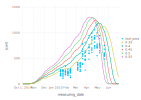

In [19]:
p = visualize(obs, :measuring_date, :leaf_area;
    xlim,
    ylim = (0,1500),
)
visualize!(p, Garlic.Model, :time, :green_leaf_area;
    config, stop, snap,
    group = :Phenology => :LTARa_max => [0.35, 0.4, 0.45, 0.5, 0.55],
    kind  = :line,
)

#### Initial Leaves at Harvest

In [20]:
config[:Phenology][:initial_leaves_at_harvest]

6

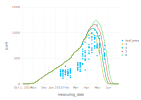

In [21]:
p = visualize(obs, :measuring_date, :leaf_area;
    xlim,
    ylim = (0,1500),
)
visualize!(p, Garlic.Model, :time, :green_leaf_area;
    config, stop, snap,
    group = :Phenology => :ILN => [3, 4, 5, 6],
    kind  = :line,
)

#### Critical Photoperiod

In [22]:
config[:Phenology][:critical_photoperiod]

12

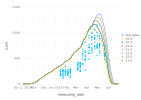

In [23]:
p = visualize(obs, :measuring_date, :leaf_area;
    xlim,
    ylim = (0,1500),
)
visualize!(p, Garlic.Model, :time, :green_leaf_area;
    config, stop, snap,
    group = :Phenology => :critPPD => [10, 10.5, 11, 11.5, 12, 12.5, 13],
    kind  = :line,
)

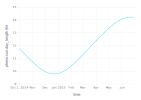

In [24]:
visualize(Garlic.Model, :time, "pheno.sun.day_length";
    config, stop, snap,
    kind = :line,
)

#### Leaf Initiation Rate

In [25]:
config[:Phenology][:maximum_leaf_initiation_rate]

0.1003

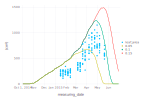

In [26]:
p = visualize(obs, :measuring_date, :leaf_area;
    xlim,
    ylim = (0,1500),
)
visualize!(p, Garlic.Model, :time, :green_leaf_area;
    config, stop, snap,
    group = :Phenology => :LIR_max => [0.05, 0.1, 0.15],
    kind  = :line,
)

#### Storage Temperature

In [27]:
config[:Phenology][:storage_temperature]

8

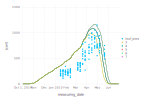

In [28]:
p = visualize(obs, :measuring_date, :leaf_area;
    xlim,
    ylim = (0,1500),
)
visualize!(p, Garlic.Model, :time, :green_leaf_area;
    config, stop, snap,
    group = :Phenology => :ST => [3, 4, 5, 6, 7],
    kind  = :line,
)

#### Stay Green

In [29]:
config[:Leaf][:stay_green]

1.5

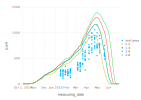

In [30]:
p = visualize(obs, :measuring_date, :leaf_area;
    xlim,
    ylim = (0,1500),
)
visualize!(p, Garlic.Model, :time, :green_leaf_area;
    config, stop, snap,
    group = :Leaf => :SG => [1.2, 1.4, 1.6, 1.8],
    kind  = :line,
)

#### Minimum Length of Longest Leaf

In [31]:
config[:Leaf][:minimum_length_of_longest_leaf]

90.0

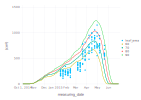

In [32]:
p = visualize(obs, :measuring_date, :leaf_area;
    xlim,
    ylim = (0,1500),
)
visualize!(p, Garlic.Model, :time, :green_leaf_area;
    config, stop, snap,
    group = :Leaf => :LM_min => [60, 70, 80, 90],
    kind  = :line,
)

#### Leaf Elongation Rate

In [33]:
config[:Leaf][:maximum_elongation_rate]

5.0

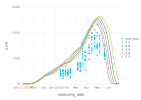

In [34]:
p = visualize(obs, :measuring_date, :leaf_area;
    xlim,
    ylim = (0,1500),
)
visualize!(p, Garlic.Model, :time, :green_leaf_area;
    config, stop, snap,
    group = :Leaf => :LER_max => [3.5, 4, 4.5, 5, 5.5],
    kind  = :line,
)

#### Planting Density

In [35]:
config[:Plant][:initial_planting_density]

55.5

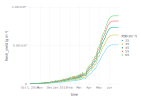

In [36]:
visualize(Garlic.Model, :time, :fresh_yield;
    config, stop, snap, xlim,
    group = :Density => :PD0 => [25, 35, 45, 55, 65],
    ylim  = (0,10000),
    kind  = :line,
)

### Application

Although the garlic model presented above is not as simple as other models we studied in the class, the Cropbox interface we use for interacting with the model remains mostly unchanged. Hope this gives you an idea how a large model can be composed of smaller pieces and used in the research.

Below is an application of the garlic model we've done recently. We used the model for testing a simple climate adaptation strategy, such as plating date shift, under climate change scenarios. More information in the [preprint](https://doi.org/10.1101/2021.11.04.467009).

#### Geography

Here are two locations in Korea. Gosan in Jeju island has warm climate that allows growing tons of garlic commercially. Chuncheon has cold winter not viable for growing this particular type of cultivar (Namdo) under current climate.

<img src="https://www.biorxiv.org/content/biorxiv/early/2021/11/04/2021.11.04.467009/F2.large.jpg" width="300">

#### Yield Projection (Gosan)

Here is the yield projection with a range of planting dates under current and future climate projection in Gosan, Jeju which is a region grows ND cultivar at commercial scale.

![](https://www.biorxiv.org/content/biorxiv/early/2021/11/04/2021.11.04.467009/F8.large.jpg)

#### Yield Projection (Chuncheon)

Here is the yield projection with a range of planting dates under current and future climate projection in Chuncheon, Gangwon where current climate is not favorable for growing ND cultivar.

![](https://www.biorxiv.org/content/biorxiv/early/2021/11/04/2021.11.04.467009/F9.large.jpg)

#### Optimal Planting Dates

Here is a plot for optimal planting dates estimated for each year under current and future climate projections in Gosan and Chuncheon.

![](https://www.biorxiv.org/content/biorxiv/early/2021/11/04/2021.11.04.467009/F10.large.jpg)

## Root Model (bonus)

Although Cropbox framework was originally designed for developing conventional process-based models with mostly static structure, we have a proof of concept application to show its capability towards functional-structural plant models (FSPM).

More specifically, dynamic generation of system instances during simulation thanks to `produce` variable allowed an implemenation of a root structure growth algorithm similar to [CRootBox](https://plant-root-soil-interactions-modelling.github.io/CRootBox/) model. Thus we named our package [CropRootBox.jl](https://github.com/cropbox/CropRootBox.jl).

In [37]:
using CropRootBox

### Configuration

Root system architecture in this example constists of three types of segments: primary root, first order lateral root, and second order lateral root. The number of initial primary roots is set by a parameter (`maxB`). As a segment grows, a new segment can be initiated and spawned depending on the transition table (`T`). Each segment type has its own set of parameters related to length (`lb` for basal zone, `la` for axial zone, `ln` for branching interval), elongation rate (`r`), branching angle (`θ`) and so on. Note that some parameter values are combined with standard deviation after `±` operator whose acutal value is decided on initialization. Random sampling of parameters is what gives more realistic root growth behavior for the model.

In [38]:
root_maize = @config(
    :RootArchitecture => :maxB => 5,
    :BaseRoot => :T => [
        # P F S
          0 1 0 ; # P
          0 0 1 ; # F
          0 0 0 ; # S
    ],
    :PrimaryRoot => (;
        lb    = 0.1 ± 0.01,
        la    = 18.0 ± 1.8,
        ln    = 0.6 ± 0.06,
        lmax  = 89.7 ± 7.4,
        r     = 6.0 ± 0.6,
        Δx    = 0.5,
        σ     = 10,
        θ     = 80 ± 8,
        N     = 1.5,
        a     = 0.04 ± 0.004,
        color = CropRootBox.RGBA(1, 0, 0, 1),
    ),
    :FirstOrderLateralRoot => (;
        lb    = 0.2 ± 0.04,
        la    = 0.4 ± 0.04,
        ln    = 0.4 ± 0.03,
        lmax  = 0.6 ± 1.6,
        r     = 2.0 ± 0.2,
        Δx    = 0.1,
        σ     = 20,
        θ     = 70 ± 15,
        N     = 1,
        a     = 0.03 ± 0.003,
        color = CropRootBox.RGBA(0, 1, 0, 1),
    ),
    :SecondOrderLateralRoot => (;
        lb    = 0,
        la    = 0.4 ± 0.02,
        ln    = 0,
        lmax  = 0.4,
        r     = 2.0 ± 0.2,
        Δx    = 0.1,
        σ     = 20,
        θ     = 70 ± 10,
        N     = 2,
        a     = 0.02 ± 0.002,
        color = CropRootBox.RGBA(0, 0, 1, 1),
    ),
)

Config for 5 systems:
  RootArchitecture
    maxB = 5
  BaseRoot
    T = [0 1 0; 0 0 1; 0 0 0]
  PrimaryRoot
    lb    = 0.1 ± 0.01
    la    = 18.0 ± 1.8
    ln    = 0.6 ± 0.06
    lmax  = 89.7 ± 7.4
    r     = 6.0 ± 0.6
    Δx    = 0.5
    σ     = 10
    θ     = 80 ± 8
    N     = 1.5
    a     = 0.04 ± 0.004
    color = RGBA{N0f8}(1.0,0.0,0.0,1.0)
  FirstOrderLateralRoot
    lb    = 0.2 ± 0.04
    la    = 0.4 ± 0.04
    ln    = 0.4 ± 0.03
    lmax  = 0.6 ± 1.6
    r     = 2.0 ± 0.2
    Δx    = 0.1
    σ     = 20
    θ     = 70 ± 15
    N     = 1
    a     = 0.03 ± 0.003
    color = RGBA{N0f8}(0.0,1.0,0.0,1.0)
  SecondOrderLateralRoot
    lb    = 0
    la    = 0.4 ± 0.02
    ln    = 0
    lmax  = 0.4
    r     = 2.0 ± 0.2
    Δx    = 0.1
    σ     = 20
    θ     = 70 ± 10
    N     = 2
    a     = 0.02 ± 0.002
    color = RGBA{N0f8}(0.0,0.0,1.0,1.0)

### Simulation

First we create an instance of pot (`Root.Pot`) which is a container holding our root system.

In [39]:
b = instance(CropRootBox.Pot)

Pot
  context = <Context>
  config = <Config>
  dist (distance) = <call>
  r1 (top_radius) = 10.0 cm
  r2 (bottom_radius) = 6.0 cm
  h (height) = 30.0 cm
  sq (square) = false

Then, an instance of root system (`Root.RootArchitecture`) is created with parameters for maize (`root_maize`). The instance of pot (`b`) just created above is supplied as an option. `seed` argument indicates a seed number for random number generator. By having a fixed seed number, we have same simulation results every time the model runs.

In [40]:
s = instance(CropRootBox.RootArchitecture;
    config  = root_maize,
    options = (; box = b),
    seed    = 0,
)

RootArchitecture
  context = <Context>
  config = <Config>
  box = <Pot>
  minB (minimum_number_of_basal_roots) = 1.0
  maxB (number_of_basal_roots) = 5.0
  RT0 (initial_transformation) = IdentityTransformation()
  roots = CropRootBox.var"##_PrimaryRoot#683"[]

Note that we explicitly create an instance of the model using `instance()` instead of `simulate()` which only gives an output of simulation. We need an instance later for 3D visualization.

In [41]:
r = simulate!(s; stop = 100u"d")

Progress: 100%[===========================] Time: 0:00:12 ( 5.01 ms/it)


2401×3 DataFrame
  Row │ time       minB     maxB    
      │ Quantity…  Float64  Float64 
──────┼─────────────────────────────
    1 │    0.0 hr      1.0      5.0
    2 │    1.0 hr      1.0      5.0
    3 │    2.0 hr      1.0      5.0
    4 │    3.0 hr      1.0      5.0
    5 │    4.0 hr      1.0      5.0
    6 │    5.0 hr      1.0      5.0
    7 │    6.0 hr      1.0      5.0
    8 │    7.0 hr      1.0      5.0
    9 │    8.0 hr      1.0      5.0
   10 │    9.0 hr      1.0      5.0
   11 │   10.0 hr      1.0      5.0
  ⋮   │     ⋮         ⋮        ⋮
 2392 │ 2391.0 hr      1.0      5.0
 2393 │ 2392.0 hr      1.0      5.0
 2394 │ 2393.0 hr      1.0      5.0
 2395 │ 2394.0 hr      1.0      5.0
 2396 │ 2395.0 hr      1.0      5.0
 2397 │ 2396.0 hr      1.0      5.0
 2398 │ 2397.0 hr      1.0      5.0
 2399 │ 2398.0 hr      1.0      5.0
 2400 │ 2399.0 hr      1.0      5.0
 2401 │ 2400.0 hr      1.0      5.0
                   2380 rows omitted

### Analysis

We can *gather* all root segments produced during simulation from the current instance of model.

In [42]:
L = gather!(s, CropRootBox.BaseRoot; callback = CropRootBox.gatherbaseroot!)

5900-element Vector{Any}:
 <PrimaryRoot>
 <PrimaryRoot>
 <PrimaryRoot>
 <PrimaryRoot>
 <PrimaryRoot>
 <PrimaryRoot>
 <PrimaryRoot>
 <PrimaryRoot>
 <PrimaryRoot>
 <PrimaryRoot>
 <PrimaryRoot>
 <PrimaryRoot>
 <PrimaryRoot>
 ⋮
 <SecondOrderLateralRoot>
 <SecondOrderLateralRoot>
 <SecondOrderLateralRoot>
 <SecondOrderLateralRoot>
 <SecondOrderLateralRoot>
 <SecondOrderLateralRoot>
 <SecondOrderLateralRoot>
 <SecondOrderLateralRoot>
 <SecondOrderLateralRoot>
 <SecondOrderLateralRoot>
 <SecondOrderLateralRoot>
 <FirstOrderLateralRoot>

Then, here is the total root length from this simluation.

In [43]:
[s.length' for s in L] |> sum

931.4410484598329 cm

### Visualization

3D structure of the root system can be visualized via 3D rendering packages. However, it doesn't seem to work well on our Jupyter Lab environment. I'll show you how it runs on my local computer.

In [44]:
using WGLMakie

In [45]:
scn = CropRootBox.render(s; resolution = (2000, 2000))

Due to an [issue](https://github.com/JuliaPlots/Makie.jl/issues/1396) in WGLMakie (as of 0.4.7), the rendered frame above is confined in a cell with very small height. Right click on an empty area and try open a new window for the frame (in the case of Safari browser) to see it more clearly.